pappus points:
1/3 2/3
5/3 4/3
3/5 4/5
   collinear:  True


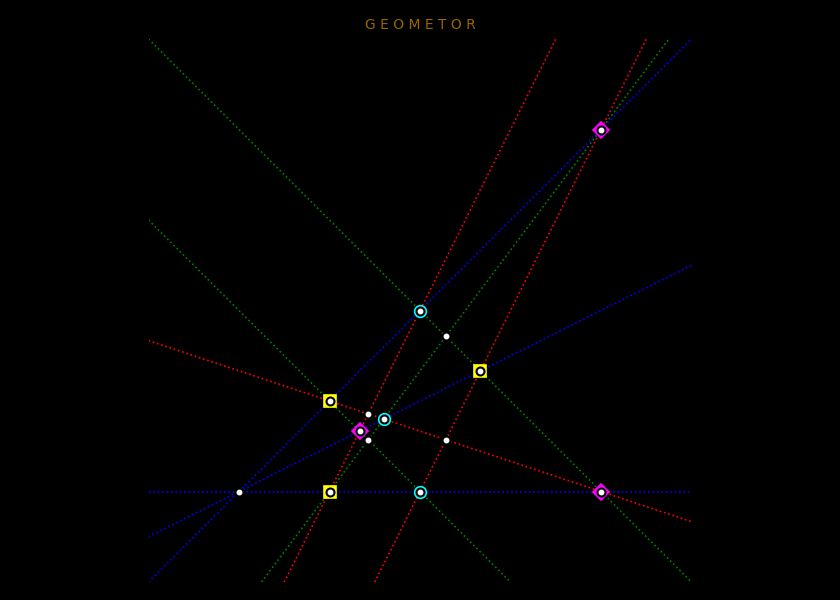

In [1]:
%run run.py
%matplotlib widget

A = []
A.append( add_point( point(0, 0, classes=['A', 'square']) ) )
A.append( add_point( point(1, 0, classes=['A', 'circle']) ) )
line_a = line(A[0], A[1], classes=['blue']) 
add_element(line_a)
x_val = 3
A.append( add_point( point(x_val, 0, classes=['A', 'diamond']) ) )

B = []
B.append( add_point( point(0, 1, classes=['B', 'square']) ) )
B.append( add_point( point(1, 2, classes=['B', 'circle']) ) )
line_b = line(B[0], B[1], classes=['blue']) 
add_element(line_b)
x_val = 3
B.append( add_point( point(3, 4, classes=['B', 'diamond']) ) )

def set_meet(u, v, type):
    '''join pairs of points to find the meet'''
    j1 = add_element( line(A[u], B[v], classes=['red']) )
    j2 = add_element( line(A[v], B[u], classes=['green']) )

    meet = j1.intersection(j2)
    # check if parallel or conicident
    if meet and isinstance(meet[0], spg.Point2D):    
        # find meets from points list
        pt = pts[pts.index(meet[0])]
        pt.classes.append('meet')
        pt.classes.append(type)

set_meet(0, 1, 'diamond')
set_meet(1, 2, 'square')
set_meet(2, 0, 'circle')
        
meets = get_pts_by_class('meet')

pappus_line = line(meets[0], meets[1], classes=['blue', 'pappus'])
add_element(pappus_line)


limx, limy = get_limits_from_points(pts)
bounds = set_bounds(limx, limy)

plt_init(limx, limy)

classes = {}
classes['blue'] = {'color':'b', 'linestyle':':'}
classes['red'] = {'color':'r', 'linestyle':':'}
classes['green'] = {'color':'g', 'linestyle':':'}

for line in get_elements_by_class('blue'):
    plot_line(line, bounds, **classes['blue'])
    
for line in get_elements_by_class('red'):
    plot_line(line, bounds, **classes['red'])
    
for line in get_elements_by_class('green'):
    plot_line(line, bounds, **classes['green'])

classes['circle'] = {'under_color':'#0FF', 'under_markersize':7, 'under_marker':'o'}
classes['square'] = {'under_color':'#FF0', 'under_markersize':7, 'under_marker':'s'}
classes['diamond'] = {'under_color':'#F0F', 'under_markersize':7, 'under_marker':'D'}

plot_points(get_pts_by_class('circle'), **classes['circle'], add_to_cursors=False)
plot_points(get_pts_by_class('square'), **classes['square'], add_to_cursors=False)
plot_points(get_pts_by_class('diamond'), **classes['diamond'], add_to_cursors=False)
plot_points(pts)

print(f'pappus points:')
for pt in meets:
    print(pt.x, pt.y)
    
print('   collinear: ', sp.Point.is_collinear(*meets))



In [43]:
triangle_sq = polygon(get_pts_by_class('square'))
plot_polygon(triangle_sq, color='#FF03')

triangle_cir = polygon(get_pts_by_class('circle'))
plot_polygon(triangle_cir, color='#0FF3')

triangle_dia = polygon(get_pts_by_class('diamond'))
plot_polygon(triangle_dia, color='#F0F3')

In [44]:
print('points: ', len(pts))
for pt in pts:
    print(f'{str(pt.x): >8} {str(pt.y): >8} {pt.classes}')
print('elements: ', len(elements))
for el in elements:
    print(f'{el.coefficients} {el.classes}')

points:  14
       0        0 ['A', 'square']
       1        0 ['A', 'circle']
       3        0 ['A', 'diamond']
       0        1 ['B', 'square']
       1        2 ['B', 'circle']
      -1        0 []
       3        4 ['B', 'diamond']
     1/3      2/3 ['meet', 'diamond']
     5/3      4/3 ['meet', 'square']
     3/7      6/7 []
     9/7      4/7 []
     3/7      4/7 []
     9/7     12/7 []
     3/5      4/5 ['meet', 'circle']
elements:  9
(0, 1, 0) ['blue']
(-1, 1, -1) ['blue']
(-2, 1, 0) ['red']
(-1, -1, 1) ['green']
(-4, 2, 4) ['red']
(-2, -2, 6) ['green']
(-1, -3, 3) ['red']
(-4, 3, 0) ['green']
(-2/3, 4/3, -2/3) ['blue', 'pappus']


In [5]:
sp1 = spread(line_a, pappus_line)
if not math.isnan(sp1):
    print(sp1)


9/25


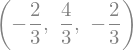

In [6]:
pappus_line.coefficients

In [9]:
# line_b.subs('x', 5)
line_b.equation().subs('x', 5)

In [7]:
line_b.equation().as_expr().subs(x, 5)

In [11]:
eq1 = sp.Eq(line_b.equation().expand(), 0)
# eq1 = sp.Expr(line_b.equation())
eq1 - sp.Expr(line_b.equation().as_expr())

TypeError: unsupported operand type(s) for -: 'Equality' and 'Expr'

In [20]:
line_b.equation().as_expr()

In [27]:
# eq2 = sp.Eq(-x + y - 1, 0)
eq1 = x - 5
eq2 = -x + y - 1
eq2 = line_b.equation() + 0
# eq2
sp.solve([eq1, eq2])

In [13]:
l1 = line(A1, A2)
l1.equation()

NameError: name 'A1' is not defined

In [23]:
sp.solve([eq1, eq2], y)

In [ ]:
sp.solve(line_b.equation(), eq)

In [ ]:
line_b.intersection(sp.Line(sp.Eq(x + 0 * y - 5)))

In [15]:
sp.Eq(x, 5)

In [ ]:
cpu_count()

In [4]:
line_get_y(line_b, 3)